<a href="https://colab.research.google.com/github/madjouradem/tomato-diseases-detection-model-using-CNN/blob/master/tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:

# # Plant Disease Classification using CNN

# This notebook demonstrates how to classify plant diseases using a Convolutional Neural Network (CNN)

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import shutil
import math
import cv2



array([[[245, 236, 203],
        [239, 232, 197],
        [240, 232, 202],
        ...,
        [244, 238, 216],
        [243, 237, 213],
        [242, 238, 211]],

       [[248, 239, 208],
        [240, 235, 207],
        [244, 241, 221],
        ...,
        [246, 243, 216],
        [244, 242, 213],
        [243, 242, 210]],

       [[247, 240, 213],
        [244, 241, 223],
        [250, 251, 241],
        ...,
        [250, 248, 232],
        [248, 247, 228],
        [244, 243, 221]],

       ...,

       [[234, 247, 253],
        [231, 240, 251],
        [222, 226, 243],
        ...,
        [206, 232, 238],
        [185, 218, 226],
        [157, 201, 209]],

       [[235, 248, 251],
        [221, 227, 229],
        [161, 165, 165],
        ...,
        [214, 229, 235],
        [207, 227, 234],
        [195, 223, 232]],

       [[233, 246, 247],
        [179, 186, 186],
        [ 83,  93,  90],
        ...,
        [207, 224, 226],
        [205, 222, 225],
        [201, 220, 226]]], dtype=uint8)
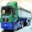

In [ ]:
# plt.imread('/content/cifar10_image.png')
# cv2.imread('/content/cifar10_image.png')

#get the dataset

In [ ]:
# !kaggle datasets download 'fernando2rad/x-ray-lung-diseases-images-9-classes'
# !unzip x-ray-lung-diseases-images-9-classes.zip

In [4]:

# !kaggle datasets download  'arjuntejaswi/plant-village'
# !unzip plant-village.zip

# # # remove the folders that are not needed
# shutil.rmtree('PlantVillage/Pepper__bell___Bacterial_spot')
# shutil.rmtree('PlantVillage/Pepper__bell___healthy')
# shutil.rmtree('PlantVillage/Potato___Early_blight')
# shutil.rmtree('PlantVillage/Potato___healthy')
# shutil.rmtree('PlantVillage/Potato___Late_blight')




In [5]:
# Load the dataset using image_dataset_from_directory
ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32

    )

Found 16011 files belonging to 10 classes.


In [6]:
#  Get class names
classes_names = ds.class_names
classes_names


['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

ValueError: Attempt to convert a value (<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>) with an unsupported type (<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>) to a Tensor.

In [9]:
# prompt: number of element in Tomato_Late_blight class

import tensorflow as tf

ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

class_names = ds.class_names

# Assuming 'Tomato_Late_blight' is one of the class names
if 'Tomato_Late_blight' in class_names:
  tomato_late_blight_index = class_names.index('Tomato_Late_blight')

  # Count the number of elements in the 'Tomato_Late_blight' class
  count = 0
  for images, labels in ds:
    count += tf.reduce_sum(tf.cast(labels == tomato_late_blight_index, tf.int32)).numpy()

  print(f"Number of elements in Tomato_Late_blight class: {count}")
else:
  print("'Tomato_Late_blight' class not found in the dataset.")


Found 16011 files belonging to 10 classes.
Number of elements in Tomato_Late_blight class: 1909


Tomato_Bacterial_spot
Tomato_Early_blight
Tomato_healthy
Tomato_Bacterial_spot
Tomato_Late_blight
Tomato_Septoria_leaf_spot
Tomato_Bacterial_spot
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato__Tomato_YellowLeaf__Curl_Virus
Tomato_Spider_mites_Two_spotted_spider_mite
Tomato_Early_blight
Tomato__Tomato_YellowLeaf__Curl_Virus


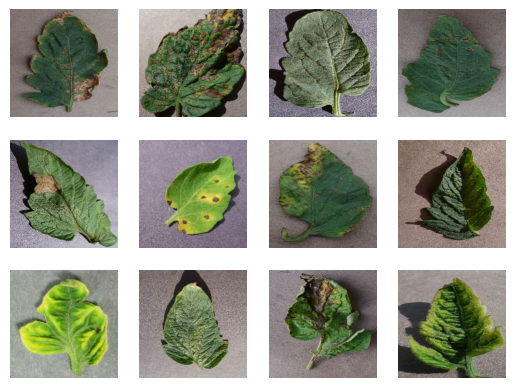

In [10]:
# Display some images from the dataset

for image_batch , labels_batch in ds.take(1):

  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.axis('off')
    print(classes_names[labels_batch[i].numpy()])

# for image_batch , labels_batch in ds.take(1):

# matrix =[[[]]]
# for image_batch , labels_batch in ds.take(1):
#     len = image_batch.shape
#     print(len)
#     matrix = image_batch[0].numpy()

#     break
# print(matrix)

# Data Splitting

In [11]:

# # Data Splitting
def split_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  if shuffle:
    ds.shuffle(shuffle_size,seed=12)

  # ds_size = ds.cardinality().numpy()
  train_size = round(501*train_split)
  val_size = round(501*val_split)
  test_size = round(501*test_split)

  print(train_size,val_size,test_size)


  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(val_size+train_size).take(test_size)
  return train_ds,val_ds,test_ds

train_ds,val_ds,test_ds= split_dataset(ds)
print(len(train_ds),len(val_ds),len(test_ds))



401 50 50
401 50 50


In [12]:
# Cache, shuffle, and prefetch the datasets for performance
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
# Define input shape and preprocessing layers
input_shape = (32,256,256,3)

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(256, 256,input_shape=input_shape[1:]),
  layers.Rescaling(1./255),
])
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


##fit the model

In [14]:
# Define the CNN model using the Sequential API
model = models.Sequential([
 # Resize and rescale the input images using the resize_and_rescale preprocessing layer
  resize_and_rescale,
  # Apply data augmentation to the images using the data_augmentation preprocessing layer
  data_augmentation,
  # First convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and specified input shape
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape= input_shape),
 # First max pooling layer with a 2x2 pool size
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.MaxPooling2D((2,2)),
#  Flatten the output from the convolutional layers into a 1D vector
  tf.keras.layers.Flatten(),
 # First fully connected (dense) layer with 64 units and ReLU activation
  tf.keras.layers.Dense(32, activation='relu'),

# Output layer

  tf.keras.layers.Dense(__builtins__.len(classes_names),activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,178 (309.29 KB)

 Trainable params: 79,178 (309.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
# This step configures the model for training by specifying:
# - Loss function: SparseCategoricalCrossentropy (used for multi-class classification with integer labels)
# - Optimizer: Adam (a popular optimization algorithm)
# - Metrics: Accuracy (to evaluate the model's performance)
# from_logits=False indicates that the output layer uses a softmax activation function
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy']) # Added loss, optimizer, and met


# Train the model
# This step initiates the training process using the following parameters:
# - train_ds: The training dataset
# - epochs: The number of times the model will iterate over the entire training dataset (50 in this case)
# - batch_size: The number of samples processed before updating the model's weights (32 in this case)
# - validation_data: The validation dataset used to monitor performance and prevent overfitting
# - verbose: Controls the amount of output displayed during training (1 for progress updates per epoch)
model.fit(train_ds,epochs=10, batch_size=32, validation_data=val_ds,verbose=1)

Epoch 1/10
401/401 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.2826 - loss: 1.9516 - val_accuracy: 0.5144 - val_loss: 1.3517
Epoch 2/10
400/401 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6301 - loss: 1.0632

In [ ]:

plt.figure(figsize=(20, 20))

# Iterate through the first batch of images and labels from the test dataset
for image_batch , labels_batch in test_ds.take(1) :
  for i in range(12):
    # Make predictions on a single image using the trained model
    predictions = model.predict(tf.expand_dims(image_batch[i], axis=0))
    # Get the actual class name
    pred_image_class = classes_names[np.argmax(predictions)]
    confidence = round(np.max(predictions) * 100)

    # Get the actual class name from the labels batch
    actual_class_name = classes_names[labels_batch[i]]

    ax = plt.subplot(3, 4, i + 1)
    plt.title(f"Actual: {actual_class_name},\n Predicted: {pred_image_class}.\n Confidence: {confidence}%")
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
accuracy, recall, precision, f1_score = model.evaluate(test_ds)
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1_score)

In [ ]:
# export model from colab
from google.colab import files

model_save_path = '/content'
model.export(model_save_path,)
files.download('./saved_model.pb')

# New Section

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import shutil
import math

In [ ]:
# download the dataset from kaggle {https://www.kaggle.com/datasets/arjuntejaswi/plant-village}
# !kaggle datasets download  'arjuntejaswi/plant-village'
# !unzip plant-village.zip

# remove the folders that are not needed



In [ ]:
# shutil.rmtree('PlantVillage/Pepper__bell___Bacterial_spot')
# shutil.rmtree('PlantVillage/Pepper__bell___healthy')
# shutil.rmtree('PlantVillage/Potato___Early_blight')
# shutil.rmtree('PlantVillage/Potato___healthy')
# shutil.rmtree('PlantVillage/Potato___Late_blight')

In [ ]:
tf_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage',
    seed=123,
    image_size=(256, 256),
    batch_size=32
)

In [ ]:
classes_names=tf_dataset.class_names

In [ ]:
for image , lable in tf_dataset.take(1):
    # plt
    plt.imshow(image[0].numpy().astype("uint8"))
    plt.title(classes_names[lable[0]])
    plt.axis('off')
    plt.show()
    # print(image.shape
    print(lable.numpy())

In [ ]:
def splitDataSet(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

  if shuffle:
    dataset = dataset.shuffle(shuffle_size, seed=12)

  train_size =round(len(dataset) * train_split)
  val_size =round(len(dataset) * val_split)
  test_size =round(len(dataset) * test_split)


  test_dataset = dataset.take(test_size)
  train_dataset = dataset.skip(test_size).take(train_size)
  val_dataset = dataset.skip(test_size+train_size).take(val_size)

  print(len(test_dataset))
  print(len(train_dataset))
  print(len(val_dataset))
  print(len(dataset))

  return train_dataset, val_dataset, test_dataset


train_dataset, val_dataset, test_dataset =splitDataSet(tf_dataset)

In [ ]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape=(32,256,256,3)
resize_rescal = tf.keras.Sequential([
  layers.Resizing(256,256,input_shape=input_shape[1:]),
  layers.Rescaling(1./256)
])
data_augmentation= tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [ ]:
model = models.Sequential([
  resize_rescal,
  data_augmentation,
  layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  # layers.Dense(32, activation='relu'),
  layers.Dense(len(classes_names), activation='softmax'),
  ])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy'],
)

In [ ]:
model.summary()

In [ ]:
model.fit(train_dataset, batch_size=32, validation_data=val_dataset, verbose=1, epochs=50)

In [ ]:
accuracy, recall, precision, f1_score = model.evaluate(test_ds)
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1_score)

accuracy = np.array(model.predict(test_ds.take(1)))
print(accuracy[0])


In [ ]:
# export model from colab
from google.colab import files

model_save_path = '/content'
model.export(model_save_path)
files.download('./saved_model.pb')